# Tribeca Data Wrangling

This supplemental notebook documents and demonstrates the data wrangling for the Tribeca dataset.

## Sources

Data: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)

Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)


In [2]:
import pandas as pd
import pandas_profiling

# Read New York City property sales data
df = pd.read_csv('../data/condos/NYC_Citywide_Rolling_Calendar_Sales.csv')

# Change column names: replace spaces with underscores
df.columns = [col.replace(' ', '_') for col in df]

# Get Pandas Profiling Report
df.profile_report()

In [3]:
# Does this data include the Tribeca neighborhood?
mask = df['NEIGHBORHOOD'].str.contains('TRIBECA')
df[mask]

BOROUGH NEIGHBORHOOD          BUILDING_CLASS_CATEGORY  \
220          1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
763          1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
996          1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
1276         1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
1542         1      TRIBECA          02 TWO FAMILY DWELLINGS   
...        ...          ...                              ...   
22221        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
22732        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
22733        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
22897        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
22898        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   

      TAX_CLASS_AT_PRESENT  BLOCK   LOT  EASE-MENT BUILDING_CLASS_AT_PRESENT  \
220                      2    222  1013        NaN                        R4   
763                      2     16  9022        NaN                        R4   
996                      2    212  1404        NaN                        R4   
1276                     2     16  1441        NaN                        R4   
1542                     1    132    26        NaN                        S2   
...                    ...    ...   ...        ...                       ...   
22221                    2    222  1206        NaN                        R4   
22732                    2     16  1806        NaN                        R4   
22733                    2     16  8071        NaN                        R4   
22897                    2     16  8132        NaN                        R4   
22898                    2    140  1162        NaN                        R4   

                          ADDRESS APARTMENT_NUMBER  ...  RESIDENTIAL_UNITS  \
220         181 HUDSON STREET, 6D               6D  ...                1.0   
763    10 LITTLE WEST STREET, 19A              19A  ...                1.0   
996           11 BEACH STREET, 1D               1D  ...                1.0   
1276    30 LITTLE WEST STREET, 7G               7G  ...                1.0   
1542         75 WARREN STREET, XX              NaN  ...                2.0   
...                           ...              ...  ...                ...   
22221    443 GREENWICH STREET, 1F               1F  ...                1.0   
22732  70 LITTLE WEST STREET, 11K              11K  ...                1.0   
22733      2 SOUTH END AVENUE, 5G               5G  ...                1.0   
22897      2 SOUTH END AVENUE, 8B               8B  ...                1.0   
22898        311 GREENWICH ST, 8B               8B  ...                1.0   

       COMMERCIAL_UNITS  TOTAL_UNITS  LAND_SQUARE_FEET GROSS_SQUARE_FEET  \
220                 0.0          1.0             7,878            1840.0   
763                 0.0          1.0                 0            1759.0   
996                 0.0          1.0            11,213            2651.0   
1276                0.0          1.0                 0            1190.0   
1542                1.0          3.0             1,819           10117.0   
...                 ...          ...               ...               ...   
22221               0.0          1.0            35,127            2429.0   
22732               0.0          1.0                 0            1601.0   
22733               0.0          1.0                 0             634.0   
22897               0.0          1.0                 0             939.0   
22898               0.0          1.0             9,900             695.0   

       YEAR_BUILT  TAX_CLASS_AT_TIME_OF_SALE  BUILDING_CLASS_AT_TIME_OF_SALE  \
220        1909.0                          2                              R4   
763           0.0                          2                              R4   
996        1900.0                          2                              R4   
1276       2005.0                          2                              R4   
1542       1905.0          

In [4]:
# Keep this subset
df = df[mask]

# Down from > 20k rows to < 150
df.shape

(146, 21)

In [5]:
# Why so few property sales in Tribeca?
# Check the date range
# It's just the first 4 months of 2019
df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'], infer_datetime_format=True)
df['SALE_DATE'].describe()

/Users/shahnam/.pyenv/versions/3.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/shahnam/.pyenv/versions/3.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """


count                     146
unique                     66
top       2019-02-12 00:00:00
freq                       17
first     2019-01-03 00:00:00
last      2019-04-30 00:00:00
Name: SALE_DATE, dtype: object

In [6]:
# See the Pandas Profiling Report:
# SALE_PRICE was read as strings
df['SALE_PRICE'] = (
    df['SALE_PRICE']
    .str.replace('$','')
    .str.replace('-','')
    .str.replace(',','')
    .astype(int)
)

/Users/shahnam/.pyenv/versions/3.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
# SALE_PRICE is now a number, but hard to read in scientific notation
# Format numbers: Comma separator for thousands. Zero decimals
pd.options.display.float_format = '{:,.0f}'.format
df.describe()

BOROUGH  BLOCK   LOT  EASE-MENT  ZIP_CODE  RESIDENTIAL_UNITS  \
count      146    146   146          0       146                146   
mean         1    123 1,980        nan     9,732                  3   
std          0     84 1,738        nan     1,843                 23   
min          1     16     1        nan         0                  0   
25%          1     16 1,112        nan    10,007                  1   
50%          1    142 1,362        nan    10,013                  1   
75%          1    212 2,194        nan    10,013                  1   
max          1    224 9,057        nan    10,282                283   

       COMMERCIAL_UNITS  TOTAL_UNITS  GROSS_SQUARE_FEET  YEAR_BUILT  \
count               146          146                146         146   
mean                  0            3              4,574       1,595   
std                   0           24             25,521         781   
min                   0            0                  0           0   
25%                   0            1                862       1,905   
50%                   0            1              1,788       1,986   
75%                   0            1              2,522       2,006   
max                   4          286            305,542       2,016   

       TAX_CLASS_AT_TIME_OF_SALE  SALE_PRICE  
count                        146         146  
mean                           2   8,884,964  
std                            0  23,639,981  
min                            1           0  
25%                            2     976,875  
50%                            2   2,750,000  
75%                            2   7,131,025  
max                            4 260,000,000

In [8]:
# Max SCALE_PRICE is $260 million!
# Look at this observation.
# Equivalent to: df[df['SALE_PRICE']==260000000]
df.query('SALE_PRICE == 260000000')

BOROUGH NEIGHBORHOOD           BUILDING_CLASS_CATEGORY  \
6499        1      TRIBECA  08 RENTALS - ELEVATOR APARTMENTS   

     TAX_CLASS_AT_PRESENT  BLOCK  LOT  EASE-MENT BUILDING_CLASS_AT_PRESENT  \
6499                    2    224    1        nan                        D8   

                   ADDRESS APARTMENT_NUMBER  ...  RESIDENTIAL_UNITS  \
6499  34 DESBROSSES STREET              NaN  ...                283   

      COMMERCIAL_UNITS  TOTAL_UNITS  LAND_SQUARE_FEET GROSS_SQUARE_FEET  \
6499                 3          286            36,858           305,542   

      YEAR_BUILT  TAX_CLASS_AT_TIME_OF_SALE  BUILDING_CLASS_AT_TIME_OF_SALE  \
6499       2,007                          2                              D8   

     SALE_PRICE  SALE_DATE  
6499  260000000 2019-02-01  

[1 rows x 21 columns]

In [9]:
# How many property sales were for multiple units?
df['TOTAL_UNITS'].value_counts()

1      131
0       11
5        1
286      1
8        1
3        1
Name: TOTAL_UNITS, dtype: int64

In [10]:
# Keep only the single units

# Would this be better though?
# df = df[(df.RESIDENTIAL_UNITS==1) & (df.COMMERICAL_UNITS==0)]

df = df.query('TOTAL_UNITS==1')
df.describe()

BOROUGH  BLOCK   LOT  EASE-MENT  ZIP_CODE  RESIDENTIAL_UNITS  \
count      131    131   131          0       131                131   
mean         1    118 2,189        nan     9,700                  1   
std          0     86 1,711        nan     1,943                  0   
min          1     16 1,001        nan         0                  0   
25%          1     16 1,130        nan    10,007                  1   
50%          1    141 1,441        nan    10,013                  1   
75%          1    214 2,450        nan    10,280                  1   
max          1    223 9,057        nan    10,282                  1   

       COMMERCIAL_UNITS  TOTAL_UNITS  GROSS_SQUARE_FEET  YEAR_BUILT  \
count               131          131                131         131   
mean                  0            1              2,520       1,572   
std                   0            0              4,772         805   
min                   0            1                432           0   
25%                   0            1                982       1,905   
50%                   0            1              1,900       1,987   
75%                   0            1              2,508       2,006   
max                   1            1             39,567       2,016   

       TAX_CLASS_AT_TIME_OF_SALE  SALE_PRICE  
count                        131         131  
mean                           2   7,626,487  
std                            0  11,460,762  
min                            2           0  
25%                            2     978,750  
50%                            2   3,145,000  
75%                            2   7,461,000  
max                            4  39,285,000

In [11]:
# Now max sales price is $39 million
# Look at this observation
# It's huge, over 8,000 square feet
# Maybe it's legit, just a huge, expensive condo
df.query('SALE_PRICE == 39285000')

BOROUGH NEIGHBORHOOD          BUILDING_CLASS_CATEGORY  \
9236        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   

     TAX_CLASS_AT_PRESENT  BLOCK   LOT  EASE-MENT BUILDING_CLASS_AT_PRESENT  \
9236                    2    223  1144        nan                        R4   

                    ADDRESS APARTMENT_NUMBER  ...  RESIDENTIAL_UNITS  \
9236  70 VESTRY STREET, 12S              12S  ...                  1   

      COMMERCIAL_UNITS  TOTAL_UNITS  LAND_SQUARE_FEET GROSS_SQUARE_FEET  \
9236                 0            1                 0             8,346   

      YEAR_BUILT  TAX_CLASS_AT_TIME_OF_SALE  BUILDING_CLASS_AT_TIME_OF_SALE  \
9236       2,016                          2                              R4   

     SALE_PRICE  SALE_DATE  
9236   39285000 2019-02-15  

[1 rows x 21 columns]

In [12]:
# The min sales price is $0

# There's a glossary here: 
# https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page

# It says:

# A $0 sale indicates that there was a transfer of ownership without a 
# cash consideration. There can be a number of reasons for a $0 sale including 
# transfers of ownership from parents to children. 

# How often did $0 sales occur in this subset of the data?
len(df.query('SALE_PRICE == 0'))

15

In [13]:
# 75% percentile for gross square feet is 2,500
# But the max is over 39,000 square feet.

# Look at property sales for > 5,000 square feet

# We see the same condo we looked at earlier,
# Plus two property sales at 39,567 square feet.
# TOTAL_UNITS = 1, but BUILDING_CLASS_CATEGORY = 2-10 UNIT RESIDENTIAL
# Is this dirty data?

df.query('GROSS_SQUARE_FEET > 5000')

BOROUGH NEIGHBORHOOD            BUILDING_CLASS_CATEGORY  \
9236         1      TRIBECA    13 CONDOS - ELEVATOR APARTMENTS   
10487        1      TRIBECA  15 CONDOS - 2-10 UNIT RESIDENTIAL   
16008        1      TRIBECA  15 CONDOS - 2-10 UNIT RESIDENTIAL   

      TAX_CLASS_AT_PRESENT  BLOCK   LOT  EASE-MENT BUILDING_CLASS_AT_PRESENT  \
9236                     2    223  1144        nan                        R4   
10487                   2C    179  1607        nan                        R1   
16008                   2C    179  1602        nan                        R1   

                     ADDRESS APARTMENT_NUMBER  ...  RESIDENTIAL_UNITS  \
9236   70 VESTRY STREET, 12S              12S  ...                  1   
10487    24 LEONARD ST, PH W             PH W  ...                  1   
16008   24 LEONARD STREET, 2                2  ...                  1   

       COMMERCIAL_UNITS  TOTAL_UNITS  LAND_SQUARE_FEET GROSS_SQUARE_FEET  \
9236                  0            1                 0             8,346   
10487                 0            1             9,983            39,567   
16008                 0            1             9,983            39,567   

       YEAR_BUILT  TAX_CLASS_AT_TIME_OF_SALE  BUILDING_CLASS_AT_TIME_OF_SALE  \
9236        2,016                          2                              R4   
10487       1,940                          2                              R1   
16008       1,940                          2                              R1   

      SALE_PRICE  SALE_DATE  
9236    39285000 2019-02-15  
10487    9857100 2019-02-22  
16008    9718000 2019-03-21  

[3 rows x 21 columns]

In [14]:
# What are the building class categories?
# How frequently does each occur?

df['BUILDING_CLASS_CATEGORY'].value_counts()

13 CONDOS - ELEVATOR APARTMENTS               121
15 CONDOS - 2-10 UNIT RESIDENTIAL               8
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT      1
46 CONDO STORE BUILDINGS                        1
Name: BUILDING_CLASS_CATEGORY, dtype: int64

In [15]:
# Keep subset of rows:
# Sale price more than $0, 
# Building class category = Condos - Elevator Apartments

mask = (df['SALE_PRICE'] > 0) & (df['BUILDING_CLASS_CATEGORY'] == '13 CONDOS - ELEVATOR APARTMENTS')
df = df[mask]

# Down to 106 rows
df.shape

(106, 21)

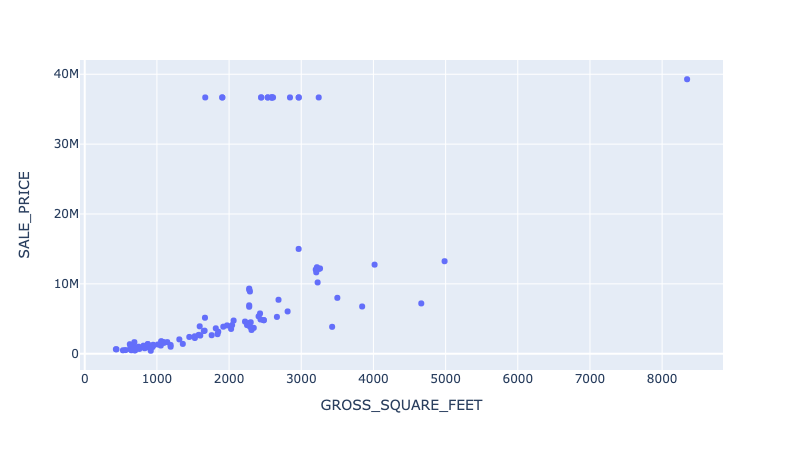

In [17]:
# Scatter plot
import plotly.express as px
px.scatter(df, x='GROSS_SQUARE_FEET', y='SALE_PRICE')

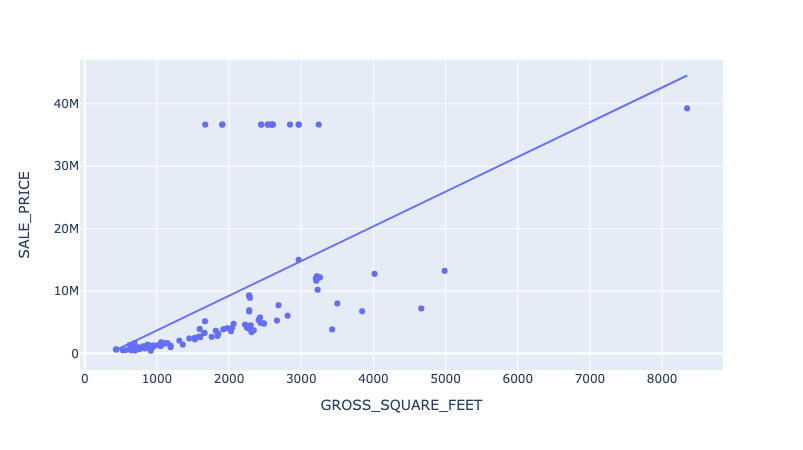

In [18]:
# With OLS (Ordinary Least Squares) trendline,
# The outliers influence the "line of best fit"
px.scatter(df, x='GROSS_SQUARE_FEET', y='SALE_PRICE', trendline='ols')

In [19]:
# Look at sales for more than $35 million

# All are at 70 Vestry Street
# All but one have the same SALE_PRICE & SALE_DATE
# Was the SALE_PRICE for each? Or in total?
# Is this dirty data?

df.query('SALE_PRICE > 35000000')

BOROUGH NEIGHBORHOOD          BUILDING_CLASS_CATEGORY  \
8370        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8371        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8372        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8373        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8374        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8375        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8376        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8377        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8378        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8379        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8380        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8381        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8382        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8383        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
8384        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   
9236        1      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS   

     TAX_CLASS_AT_PRESENT  BLOCK   LOT  EASE-MENT BUILDING_CLASS_AT_PRESENT  \
8370                    2    223  1105        nan                        R4   
8371                    2    223  1123        nan                        R4   
8372                    2    223  1124        nan                        R4   
8373                    2    223  1125        nan                        R4   
8374                    2    223  1126        nan                        R4   
8375                    2    223  1127        nan                        R4   
8376                    2    223  1128        nan                        R4   
8377                    2    223  1129        nan                        R4   
8378                    2    223  1130        nan                        R4   
8379                    2    223  1131        nan                        R4   
8380                    2    223  1132        nan                        R4   
8381                    2    223  1134        nan                        R4   
8382                    2    223  1137        nan                        R4   
8383                    2    223  1140        nan                        R4   
8384                    2    223  1143        nan                        R4   
9236                    2    223  1144        nan                        R4   

                    ADDRESS APARTMENT_NUMBER  ...  RESIDENTIAL_UNITS  \
8370   70 VESTRY STREET, 3C               3C  ...                  1   
8371   70 VESTRY STREET, 6C               6C  ...                  1   
8372   70 VESTRY STREET, 6D               6D  ...                  1   
8373   70 VESTRY STREET, 6E               6E  ...                  1   
8374   70 VESTRY STREET, 6F               6F  ...                  1   
8375   70 VESTRY STREET, 7A               7A  ...                  1   
8376   70 VESTRY STREET, 7B               7B  ...                  1   
8377   70 VESTRY STREET, 7C               7C  ...                  1   
8378   70 VESTRY STREET, 7D               7D  ...                  1   
8379   70 VESTRY STREET, 7E               7E  ...                  1   
8380   70 VESTRY STREET, 7F               7F  ...                  1   
8381   70 VESTRY STREET, 8W               8W  ...                  1   
8382   70 VESTRY STREET, 9W               9W  ...                  1   
8383  70 VESTRY STREET, 10W              10W  ...                  1   
8384  70 VESTRY STREET, 11W              11W  ...                  1   
9236  70 VESTRY STREET, 12S              12S  ...                  1   

      COMMERCIAL_UNITS  TOTAL_UNITS  LAND_SQUARE_FEET GROSS_SQUARE_FEET  \
8370                 0            1                 0             1,670   
8371                 0            1                 0             1,906   
8372                 0            1                 0             2,536   
8373                 0            1                 0            

In [20]:
# Make a judgment call:
# Keep rows where sale price was < $35 million
df = df.query('SALE_PRICE < 35000000')

# Down to 90 rows
df.shape

(90, 21)

In [19]:
columns = ['NEIGHBORHOOD', 
           'BUILDING_CLASS_CATEGORY', 
           'ADDRESS', 
           'APARTMENT_NUMBER', 
           'ZIP_CODE', 
           'GROSS_SQUARE_FEET',  
           'YEAR_BUILT', 
           'SALE_PRICE', 
           'SALE_DATE']

df[columns].to_csv('../data/condos/tribeca.csv', index=False)